In [1]:
#### Notebook 2019-07-30 23:37CT by Joshua Yao-Yu Lin

import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
import lenstronomy.Util.image_util as image_util
import os, sys
import pandas as pd
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
import datetime
from tensorboardX import SummaryWriter

In [2]:
root_folder = "/media/joshua/HDD_fun2/time_delay_challenge/Second_sims/"
train_folder = "train/"
test_folder = "test/"
train_data = pd.read_csv(root_folder + train_folder + "lens_info.csv")
test_data = pd.read_csv(root_folder + test_folder + "lens_info.csv")

EHT_test_path = root_folder + test_folder
files = os.listdir(EHT_test_path)
loaded_model_path = './saved_model/2019-08-06power_law_pred_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd()) 


normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor

loaded mdl！
/home/joshua/Documents/git_work_zone/time_delay_challenge


In [3]:
glo_batch_size = 1
test_num_batch = 1



class DeepLenstronomyDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train  # training set or test set
        self.train_folder = 'train'#'data_train'
        self.test_folder = 'test'#'data_test'
        #self.df = pd.read_csv('../input/clean-full-train/clean_full_data.csv') #+ '/clean_full_data.csv')


        if self.train:
            self.path = os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')


            #self.length = TRAINING_SAMPLES
        else:
            self.path = os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/lens_info.csv')
            #self.length = TESTING_SAMPLES

    def __getitem__(self, index):
        #   gamma  center_x  center_y        e1        e2  source_x  source_y  gamma_ext  psi_ext
        #print(self.df['name'].iloc[[index]])
        name = self.df['name'].iloc[[index]]
        theta_E = self.df['theta_E'].iloc[[index]]
        gamma = self.df['gamma'].iloc[[index]]
        center_x = self.df['center_x'].iloc[[index]]
        center_y = self.df['center_y'].iloc[[index]]
        e1 = self.df['e1'].iloc[[index]]
        e2 = self.df['e2'].iloc[[index]]
        source_x = self.df['source_x'].iloc[[index]]
        source_y = self.df['source_y'].iloc[[index]]
        gamma_ext = self.df['gamma_ext'].iloc[[index]]
        psi_ext = self.df['psi_ext'].iloc[[index]]
        img_path = self.path + "/" + str(name.values[0]) + ".npy"
        img = np.load(img_path)
        img = scipy.ndimage.zoom(img, 224/100, order=1)
        image = np.zeros((3, 224, 224))
        for i in range(3):
            image[i, :, :] += img
        return image, theta_E.values, gamma.values, center_x.values, center_y.values, e1.values, e2.values, source_x.values, source_y.values, gamma_ext.values, psi_ext.values


    def __len__(self):
        return self.df.shape[0]
    
train_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=True, transform=data_transform, target_transform=target_transform),
                    batch_size = glo_batch_size, shuffle = True
                    )

test_loader = torch.utils.data.DataLoader(DeepLenstronomyDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

lens parameters: theta_E, e1, e2(ground trouth) 1.5736751293001452 -0.03982031575804628 -0.06057768212115683
parameters: theta_E, e1, e2(prediction): 1.5697118 -0.038717527 -0.056908187
source positions(ground trouth) 0.001955649386501737 0.030768756401792236
source positions(prediction): 0.005420422 0.034542777
lens parameters: gamma, center_x, center_y(ground trouth) 2.000709463613959 0.035058759106812776 0.029613521856362183
parameters: gamma, center_x, center_y(prediction): 1.9698385 0.040931158 0.03648199


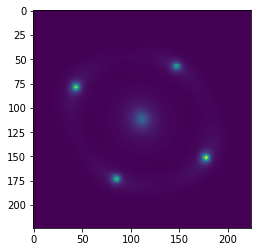

lens parameters: theta_E, e1, e2(ground trouth) 1.7638978226864803 0.014604319515288691 -0.09440817593938687
parameters: theta_E, e1, e2(prediction): 1.7537122 0.014401164 -0.08986752
source positions(ground trouth) 0.015255214221419703 0.045404802857985586
source positions(prediction): 0.017831465 0.051731616
lens parameters: gamma, center_x, center_y(ground trouth) 2.00181131083616 0.0466808478321644 0.02701662661029651
parameters: gamma, center_x, center_y(prediction): 1.9642211 0.047345243 0.034282185


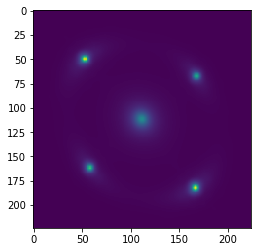

lens parameters: theta_E, e1, e2(ground trouth) 1.9637578129437323 -0.04421115343344791 -0.061212794999340986
parameters: theta_E, e1, e2(prediction): 1.9543899 -0.040413413 -0.060950387
source positions(ground trouth) -0.04154479479198127 0.038174007025380687
source positions(prediction): -0.033618324 0.04206551
lens parameters: gamma, center_x, center_y(ground trouth) 2.0004218220658907 0.015626619870270628 0.04919835228760909
parameters: gamma, center_x, center_y(prediction): 1.9684206 0.023019388 0.05244778


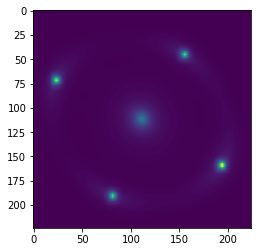

lens parameters: theta_E, e1, e2(ground trouth) 1.8594749600589 0.09189619072072136 0.04294270534818618
parameters: theta_E, e1, e2(prediction): 1.8508232 0.085676625 0.04010284
source positions(ground trouth) -0.04571143713650838 -0.033140148913057235
source positions(prediction): -0.042337812 -0.023244051
lens parameters: gamma, center_x, center_y(ground trouth) 2.0482188182769008 -0.04843837550400938 0.02945373771194432
parameters: gamma, center_x, center_y(prediction): 2.0003057 -0.03768178 0.030047424


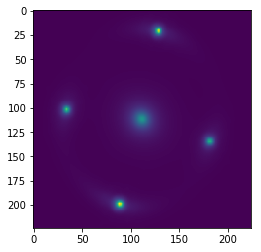

lens parameters: theta_E, e1, e2(ground trouth) 1.8342710027101243 -0.06021841802172687 -0.0592044659365612
parameters: theta_E, e1, e2(prediction): 1.8260001 -0.05738386 -0.055994775
source positions(ground trouth) -0.03682530853602033 0.001154070222223115
source positions(prediction): -0.031051526 0.005699029
lens parameters: gamma, center_x, center_y(ground trouth) 1.9679335474521829 0.013740387713531059 -0.023591950027764454
parameters: gamma, center_x, center_y(prediction): 1.9387965 0.017629698 -0.015930407


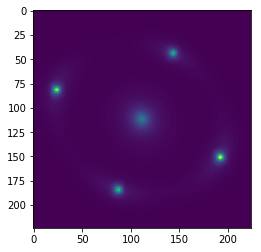

lens parameters: theta_E, e1, e2(ground trouth) 1.6585668607739776 0.024039773458975414 0.044461945519376704
parameters: theta_E, e1, e2(prediction): 1.6540242 0.024340343 0.04311703
source positions(ground trouth) -0.03204404338578907 -0.044821981513922415
source positions(prediction): -0.030906273 -0.039583787
lens parameters: gamma, center_x, center_y(ground trouth) 2.018605929954685 0.010027948383649732 0.02694177928872875
parameters: gamma, center_x, center_y(prediction): 1.9886606 0.015520699 0.035858497


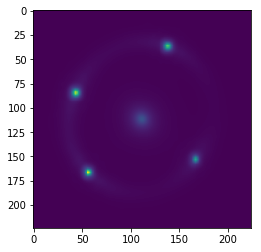

lens parameters: theta_E, e1, e2(ground trouth) 1.731024489478249 -0.06826507026426909 -0.08846616757814729
parameters: theta_E, e1, e2(prediction): 1.7192516 -0.06706098 -0.08339538
source positions(ground trouth) -0.02987765040918568 -0.02069530619603521
source positions(prediction): -0.027430149 -0.012579123
lens parameters: gamma, center_x, center_y(ground trouth) 1.999106326654852 0.005138745173655777 0.032177984243198565
parameters: gamma, center_x, center_y(prediction): 1.9621252 0.008548655 0.040823944


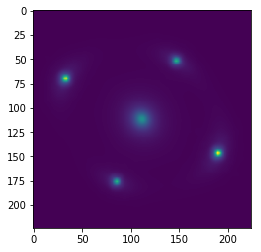

lens parameters: theta_E, e1, e2(ground trouth) 1.5512110440595577 0.005978797670683012 0.022838331489300638
parameters: theta_E, e1, e2(prediction): 1.5544013 0.0062237345 0.021434326
source positions(ground trouth) -0.038984430273217234 0.013300351086778224
source positions(prediction): -0.03855738 0.013302101
lens parameters: gamma, center_x, center_y(ground trouth) 1.9965801068481803 0.019069262764867173 0.02257670192978109
parameters: gamma, center_x, center_y(prediction): 1.9813755 0.022335336 0.029994816


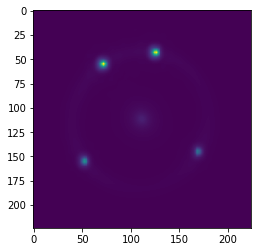

lens parameters: theta_E, e1, e2(ground trouth) 1.7554559866207746 0.06527168037699725 -0.07111626904673929
parameters: theta_E, e1, e2(prediction): 1.7455062 0.061714467 -0.06839514
source positions(ground trouth) -0.047343232338971766 0.04981801754466436
source positions(prediction): -0.038407616 0.054766618
lens parameters: gamma, center_x, center_y(ground trouth) 2.0445440878604857 0.035842057245895606 0.011594769186812258
parameters: gamma, center_x, center_y(prediction): 2.0047314 0.04633355 0.019373067


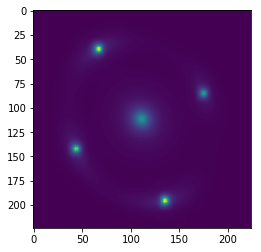

lens parameters: theta_E, e1, e2(ground trouth) 1.9355667290162453 -0.06654461774545466 0.007683249820188864
parameters: theta_E, e1, e2(prediction): 1.9255844 -0.06552294 0.0053368695
source positions(ground trouth) 0.023760044840701253 -0.028407037797497536
source positions(prediction): 0.025888352 -0.019195883
lens parameters: gamma, center_x, center_y(ground trouth) 1.9505458621800813 -0.03001384335130365 -0.04565479626365115
parameters: gamma, center_x, center_y(prediction): 1.9211526 -0.032125853 -0.025582947


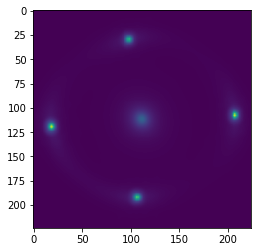

lens parameters: theta_E, e1, e2(ground trouth) 1.7308149140594806 0.07434730065137406 -0.03463207989992974
parameters: theta_E, e1, e2(prediction): 1.7239634 0.073506296 -0.033970784
source positions(ground trouth) 0.04255888812345092 -0.006332689738949446
source positions(prediction): 0.044248797 -0.00021070428
lens parameters: gamma, center_x, center_y(ground trouth) 2.010857820460239 0.01987881590751561 0.037400437956655305
parameters: gamma, center_x, center_y(prediction): 1.9785247 0.020610146 0.04411482


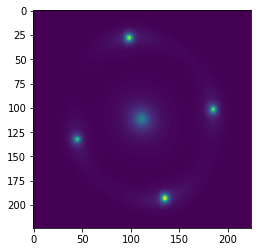

lens parameters: theta_E, e1, e2(ground trouth) 1.8064549004577453 -0.022719506703969564 0.030896457353646142
parameters: theta_E, e1, e2(prediction): 1.8035775 -0.023383532 0.030240329
source positions(ground trouth) -0.024885176740754543 -0.025735824801517662
source positions(prediction): -0.023057802 -0.022228105
lens parameters: gamma, center_x, center_y(ground trouth) 2.0112589958397287 0.0323380336118593 -0.00046977524003808535
parameters: gamma, center_x, center_y(prediction): 1.986196 0.033625424 0.009430118


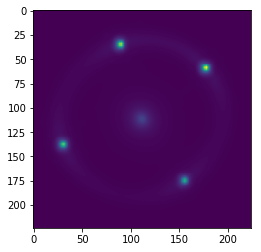

lens parameters: theta_E, e1, e2(ground trouth) 1.970338442234121 -0.018679260159690816 -0.00585809678570346
parameters: theta_E, e1, e2(prediction): 1.9721484 -0.01802143 -0.00794711
source positions(ground trouth) -0.012756888492750655 0.006293448336904449
source positions(prediction): -0.0048915464 0.012447303
lens parameters: gamma, center_x, center_y(ground trouth) 1.9901224257872616 0.041022842485336934 0.002710016951767077
parameters: gamma, center_x, center_y(prediction): 1.977094 0.047913603 0.015872099


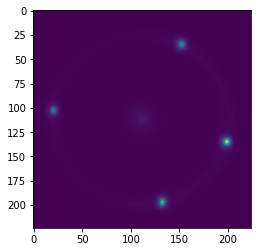

lens parameters: theta_E, e1, e2(ground trouth) 1.5416544853557357 0.007919011327356885 0.08214421985445378
parameters: theta_E, e1, e2(prediction): 1.5380944 0.0044181608 0.07470925
source positions(ground trouth) 0.041237219425607034 -0.04185088782320489
source positions(prediction): 0.04034085 -0.03558308
lens parameters: gamma, center_x, center_y(ground trouth) 1.9521887542355207 0.0349937039813185 0.042501913786307965
parameters: gamma, center_x, center_y(prediction): 1.9199197 0.028696433 0.04414656


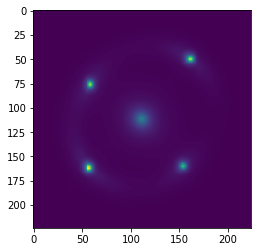

lens parameters: theta_E, e1, e2(ground trouth) 1.7781108202224982 -0.039658852191474234 0.08306214580331464
parameters: theta_E, e1, e2(prediction): 1.7676573 -0.036879655 0.078571096
source positions(ground trouth) -0.04498032811186908 0.041449176778035085
source positions(prediction): -0.042644396 0.046888113
lens parameters: gamma, center_x, center_y(ground trouth) 1.9553819381663708 0.010244573184668357 -0.03677451551290598
parameters: gamma, center_x, center_y(prediction): 1.9227928 0.016470008 -0.022750854


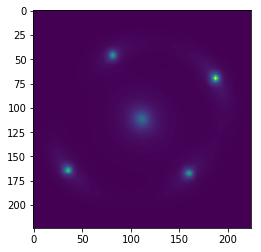

lens parameters: theta_E, e1, e2(ground trouth) 1.7772070358216374 -0.050923131263919084 0.09870339590815252
parameters: theta_E, e1, e2(prediction): 1.7651247 -0.047838796 0.09338619
source positions(ground trouth) -0.02755577766467911 0.04777571298143024
source positions(prediction): -0.026473531 0.051521175
lens parameters: gamma, center_x, center_y(ground trouth) 2.044601217780646 -0.012012101147605923 -0.010995576671005404
parameters: gamma, center_x, center_y(prediction): 2.0035446 -0.00821076 0.00048523396


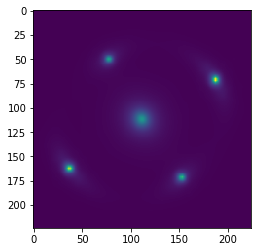

lens parameters: theta_E, e1, e2(ground trouth) 1.88283151248286 0.04970133311539696 0.05369118620775788
parameters: theta_E, e1, e2(prediction): 1.8771902 0.048496146 0.050963994
source positions(ground trouth) 0.014269185423989375 -0.018827986185869075
source positions(prediction): 0.017879898 -0.012190999
lens parameters: gamma, center_x, center_y(ground trouth) 2.036743008006522 0.04189784863585669 -0.025414316500350687
parameters: gamma, center_x, center_y(prediction): 2.0008438 0.045708984 -0.015443921


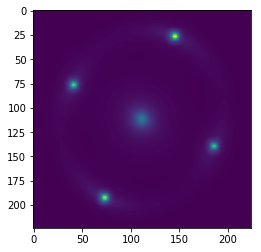

lens parameters: theta_E, e1, e2(ground trouth) 1.5981978998153084 0.09609227221501526 0.01696392743322941
parameters: theta_E, e1, e2(prediction): 1.595063 0.09181112 0.014394799
source positions(ground trouth) 0.003331358121720564 -0.049061432454319084
source positions(prediction): 0.0068219732 -0.043686815
lens parameters: gamma, center_x, center_y(ground trouth) 2.010615135077906 0.02902812894475972 0.009650589423157696
parameters: gamma, center_x, center_y(prediction): 1.9740261 0.037997216 0.017427597


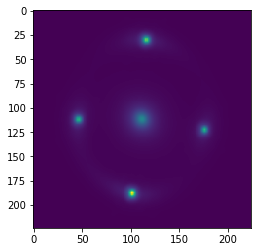

lens parameters: theta_E, e1, e2(ground trouth) 1.8142832085244327 -0.008114483651781112 -0.07658119396989947
parameters: theta_E, e1, e2(prediction): 1.8045259 -0.006740164 -0.07362172
source positions(ground trouth) 0.0010161889247526019 -0.02914040546365887
source positions(prediction): 0.0050565954 -0.02141629
lens parameters: gamma, center_x, center_y(ground trouth) 1.994893599160012 -0.004782158318526132 0.026259384613002867
parameters: gamma, center_x, center_y(prediction): 1.9623566 -0.004081957 0.038177036


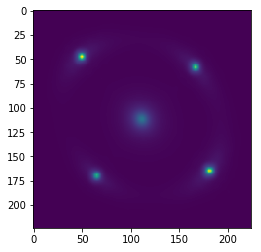

lens parameters: theta_E, e1, e2(ground trouth) 1.8554089488385592 -0.06502561909294383 -0.025218099815141448
parameters: theta_E, e1, e2(prediction): 1.8508184 -0.06428757 -0.024332102
source positions(ground trouth) 0.02914152098284765 0.02616118439724389
source positions(prediction): 0.03185892 0.030618267
lens parameters: gamma, center_x, center_y(ground trouth) 2.0158511065507905 -0.002619314957876026 -0.008006307086302344
parameters: gamma, center_x, center_y(prediction): 1.9841654 -0.009544462 0.0016064122


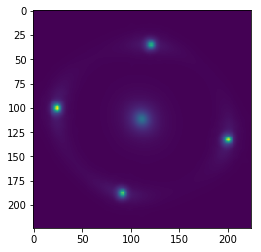

lens parameters: theta_E, e1, e2(ground trouth) 1.7036547173715857 -0.0037299604529499103 0.07058875784155035
parameters: theta_E, e1, e2(prediction): 1.6949189 -0.002768118 0.06749974
source positions(ground trouth) -0.02871054645101854 0.003539211538388577
source positions(prediction): -0.027883584 0.006374372
lens parameters: gamma, center_x, center_y(ground trouth) 1.9749479848949758 0.016720822382316522 -0.02258625316959864
parameters: gamma, center_x, center_y(prediction): 1.9453204 0.02196753 -0.014102012


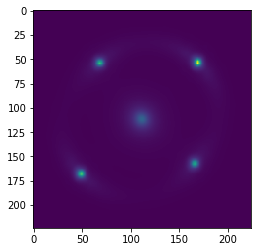

lens parameters: theta_E, e1, e2(ground trouth) 1.8289730260364496 -0.02093848899756932 -0.01330865604493643
parameters: theta_E, e1, e2(prediction): 1.8274223 -0.020340648 -0.014054105
source positions(ground trouth) 0.0213592874095038 0.03268634228330483
source positions(prediction): 0.023972118 0.037971698
lens parameters: gamma, center_x, center_y(ground trouth) 1.9580850207659024 0.012759248170509774 -0.04747166588119738
parameters: gamma, center_x, center_y(prediction): 1.9452912 0.009469047 -0.035352148


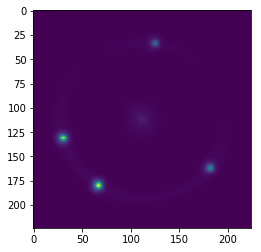

In [4]:
net.cuda()
net.eval()

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()# theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()# Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()


    print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
    output = net(data)
    print("parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
    print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
    print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
    print("lens parameters: gamma, center_x, center_y(ground trouth)", gamma.cpu().numpy()[0][0], center_x.cpu().numpy()[0][0], center_y.cpu().numpy()[0][0])
    print("parameters: gamma, center_x, center_y(prediction):", output[0][1].detach().cpu().numpy(), output[0][2].detach().cpu().numpy(), output[0][3].detach().cpu().numpy())
    
    plt.imshow(data.cpu().numpy()[0,0,:,:])
    plt.show()

    if batch_idx > 20:
        break

    
    
    
    

In [5]:
net.cuda()
net.eval()

theta_E_target_list = []
theta_E_output_list = []
gamma_target_list = []
gamma_output_list = []
center_x_target_list = []
center_x_output_list = []
center_y_target_list = []
center_y_output_list = []

e1_target_list = []
e1_output_list = []
e2_target_list = []
e2_output_list = []




source_x_target_list = []
source_x_output_list = []
source_y_target_list = []
source_y_output_list = []

for batch_idx, (data, theta_E, gamma, center_x, center_y, e1, e2, source_x, source_y, gamma_ext, psi_ext) in enumerate(test_loader):
    img = data
    data = data.float()#, theta_E.float(), gamma.float(), center_x.float(), center_y.float(), e1.float(), e2.float(), source_x.float(), source_y.float(), gamma_ext.float(), psi_ext.float()
    data= Variable(data).cuda()#Variable(theta_E).cuda(), Variable(gamma).cuda(), Variable(center_x).cuda(), Variable(center_y).cuda(), Variable(e1).cuda(), Variable(e2).cuda(), Variable(source_x).cuda(), Variable(source_y).cuda(), Variable(gamma_ext).cuda(), Variable(psi_ext).cuda()
    
    output = net(data)
    theta_E_target_list.append(theta_E.cpu().numpy()[0][0])
    gamma_target_list.append(gamma.cpu().numpy()[0][0])
    center_x_target_list.append(center_x.cpu().numpy()[0][0])
    center_y_target_list.append(center_y.cpu().numpy()[0][0])
    e1_target_list.append(e1.cpu().numpy()[0][0])
    e2_target_list.append(e2.cpu().numpy()[0][0])
    source_x_target_list.append(source_x.cpu().numpy()[0][0])
    source_y_target_list.append(source_y.cpu().numpy()[0][0])
    
    
    theta_E_output_list.append(output[0][0].detach().cpu().numpy())
    gamma_output_list.append(output[0][1].detach().cpu().numpy())
    center_x_output_list.append(output[0][2].detach().cpu().numpy())
    center_y_output_list.append(output[0][3].detach().cpu().numpy())
    e1_output_list.append(output[0][4].detach().cpu().numpy())
    e2_output_list.append(output[0][5].detach().cpu().numpy())
    source_x_output_list.append(output[0][6].detach().cpu().numpy())
    source_y_output_list.append(output[0][7].detach().cpu().numpy())
    
    
    if batch_idx > 1000:
        break
#     print("lens parameters: theta_E, e1, e2(ground trouth)", theta_E.cpu().numpy()[0][0], e1.cpu().numpy()[0][0], e2.cpu().numpy()[0][0])
#     output = net(data)
#     print("parameters: theta_E, e1, e2(prediction):", output[0][0].detach().cpu().numpy(), output[0][4].detach().cpu().numpy(), output[0][5].detach().cpu().numpy())
#     print("source positions(ground trouth)", source_x.cpu().numpy()[0][0], source_y.cpu().numpy()[0][0])
#     print("source positions(prediction):", output[0][6].detach().cpu().numpy(), output[0][7].detach().cpu().numpy())
#     plt.imshow(data.cpu().numpy()[0,0,:,:])
#     plt.show()

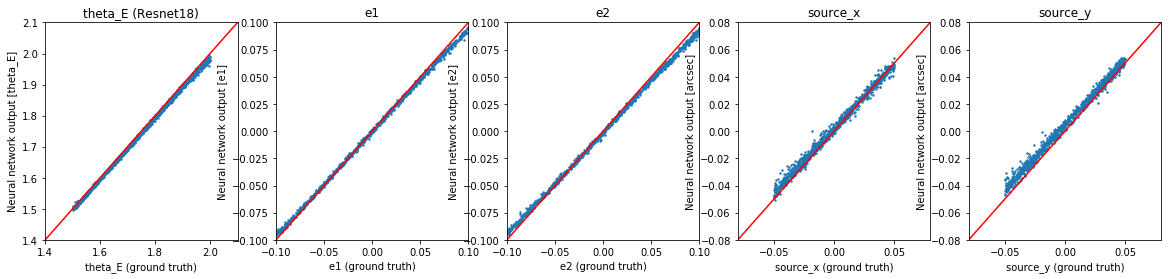

In [6]:
scale= np.linspace(1.4, 2.1 ,100)
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.scatter(theta_E_target_list, theta_E_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("theta_E (Resnet18)")
plt.xlim(1.4, 2.1)
plt.ylim(1.4, 2.1)
plt.xlabel("theta_E (ground truth)")
plt.ylabel("Neural network output [theta_E]")
#plt.savefig("./" + "scatter_plot.png")

scale= np.linspace(-0.1, 0.1 ,100)
#plt.figure(figsize=(4, 4))
plt.subplot(1, 5, 2)
plt.scatter(e1_target_list, e1_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e1")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("e1 (ground truth)")
plt.ylabel("Neural network output [e1]")


scale= np.linspace(-0.1, 0.1 ,100)
plt.subplot(1, 5, 3)
plt.scatter(e2_target_list, e2_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("e2")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("e2 (ground truth)")
plt.ylabel("Neural network output [e2]")


scale= np.linspace(-0.08, 0.08 ,100)
plt.subplot(1, 5, 4)
plt.scatter(source_x_target_list, source_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_x")
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.xlabel("source_x (ground truth)")
plt.ylabel("Neural network output [arcsec]")


scale= np.linspace(-0.08, 0.08 ,100)
plt.subplot(1, 5, 5)
plt.scatter(source_y_target_list, source_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_y")
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.xlabel("source_y (ground truth)")
plt.ylabel("Neural network output [arcsec]")

plt.savefig("./" + loaded_model_path + "scatter_plot.png")

plt.show()

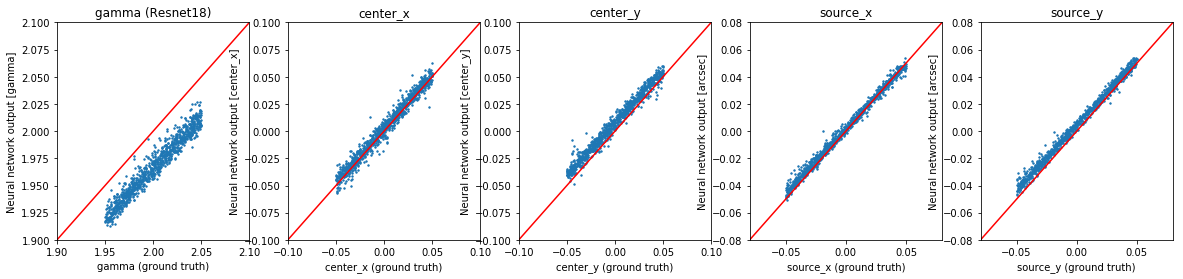

In [7]:
scale= np.linspace(1.9, 2.1 ,100)
plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.scatter(gamma_target_list, gamma_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("gamma (Resnet18)")
plt.xlim(1.9, 2.1)
plt.ylim(1.9, 2.1)
plt.xlabel("gamma (ground truth)")
plt.ylabel("Neural network output [gamma]")
#plt.savefig("./" + "scatter_plot.png")

scale= np.linspace(-0.1, 0.1 ,100)
#plt.figure(figsize=(4, 4))
plt.subplot(1, 5, 2)
plt.scatter(center_x_target_list, center_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("center_x")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("center_x (ground truth)")
plt.ylabel("Neural network output [center_x]")


scale= np.linspace(-0.1, 0.1 ,100)
plt.subplot(1, 5, 3)
plt.scatter(center_y_target_list, center_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("center_y")
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.xlabel("center_y (ground truth)")
plt.ylabel("Neural network output [center_y]")


scale= np.linspace(-0.08, 0.08 ,100)
plt.subplot(1, 5, 4)
plt.scatter(source_x_target_list, source_x_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_x")
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.xlabel("source_x (ground truth)")
plt.ylabel("Neural network output [arcsec]")


scale= np.linspace(-0.08, 0.08 ,100)
plt.subplot(1, 5, 5)
plt.scatter(source_y_target_list, source_y_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("source_y")
plt.xlim(-0.08, 0.08)
plt.ylim(-0.08, 0.08)
plt.xlabel("source_y (ground truth)")
plt.ylabel("Neural network output [arcsec]")

plt.savefig("./" + loaded_model_path + "gamma_scatter_plot.png")

plt.show()